# Guided Project: Finding Heavy Traffic Indicators on I-94

## Introduction

I'm going to analyze a dataset about the westbound traffic on the <a href ='https://en.wikipedia.org/wiki/Interstate_94'>I-94 Interstate highway</a>.

John Hogue made the dataset available, and you can download it from the <a href ='https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume'>UCI Machine Learning Repository</a>.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

Throughout this project, I focused only on **exploratory data visualization** and learned the following:
- How to visualize time series data with line plots.
- How to visualize correlations with scatter plots.
- How to visualize frequency distributions with bar plots and histograms.
- How to speed up our exploratory data visualization workflow with the pandas - library.
- How to compare graphs using grid charts.

## Setting up file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

path = 'Metro_Interstate_Traffic_Volume.csv'
df = pd.read_csv(path)

#### Examine the first and the last rows

In [2]:
df.head(5)
df.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


#### Find more information about the dataset

In [3]:
df.shape

(48204, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, the `holiday` column has 61 non-null values.

## Analyzing Traffic Volume

#### Plot a histogram to examine the distribution of the traffic_volume column. Use a Pandas method.

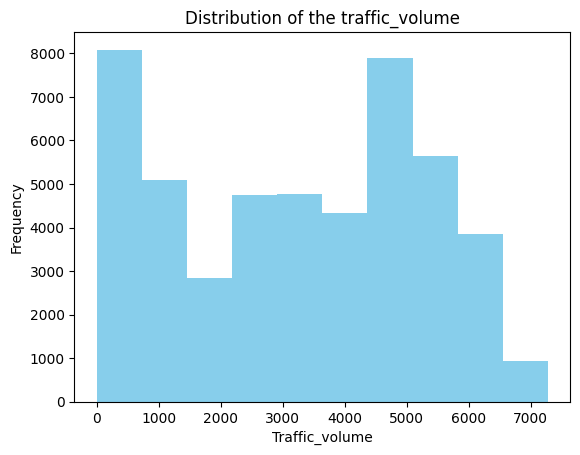

In [54]:
plt.hist(df['traffic_volume'], color='skyblue')
plt.title('Distribution of the traffic_volume')
plt.xlabel('Traffic_volume')
plt.ylabel('Frequency')
plt.show();

#### Use Series.describe() to look up a few statistics about the traffic_volume column.

In [6]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Note a few observations about the distribution of traffic_volume based on the histogram and the result of Series.describe().

The traffic volume ranges from 0 to 7280 cars, with an average of 1986.86 cars from 2012-10-02 09:00:00 to 2018-09-30 23:00:00.

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars.

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.


## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

#### Use the Series.dt.hour property to get the hour of every instance of the date_time column 

In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])

daytime = df[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
nighttime = df[( df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]

daytime.shape
nighttime.shape

(23877, 9)

(24327, 9)

#### Plot the histograms of traffic_volume for both day and night. Organize the two histograms side-by-side on a grid chart.

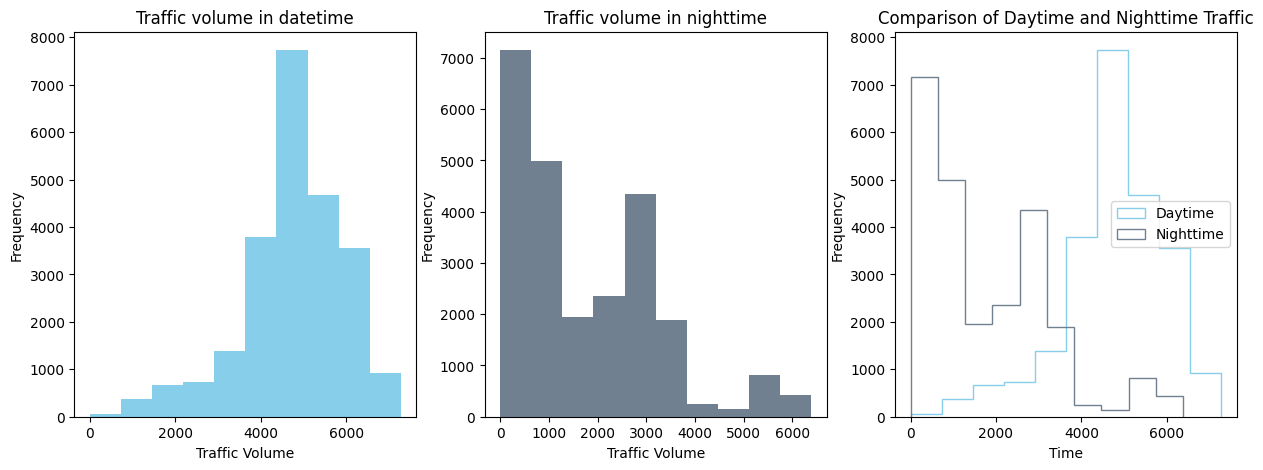

In [53]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.hist(daytime['traffic_volume'], color = 'skyblue')
plt.title('Traffic volume in datetime')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 3, 2)
plt.hist(nighttime['traffic_volume'], color = 'slategray')
plt.title('Traffic volume in nighttime')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 3, 3)
daytime['traffic_volume'].plot.hist(histtype = 'step', color = 'skyblue', label = 'Daytime', legend = True)
nighttime['traffic_volume'].plot.hist(histtype = 'step', color = 'slategrey', label = 'Nighttime', legend = True)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Comparison of Daytime and Nighttime Traffic')

plt.show();

#### Use Series.describe() to look up a few statistics for traffic_volume for both day and night.

In [9]:
daytime['traffic_volume'].describe()
nighttime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime histogram is left skewed. 

75% of the time, the number of cars that passed the station each hour was 4252 cars or less. This means that most of the traffic volume values are high

The nighttime histogram is right skewed.

75% of the time, the number of cars that passed the station each hour was less than or equal 2819 cars. This means that most of the traffic volume values are low.

Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

**Generate a line plot to visualize how the traffic volume changed each month on average.**

In [24]:
day_numeric = daytime.select_dtypes(include=['number'])
day_numeric['month'] = daytime['date_time'].dt.month
by_month = day_numeric.groupby('month').mean()
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


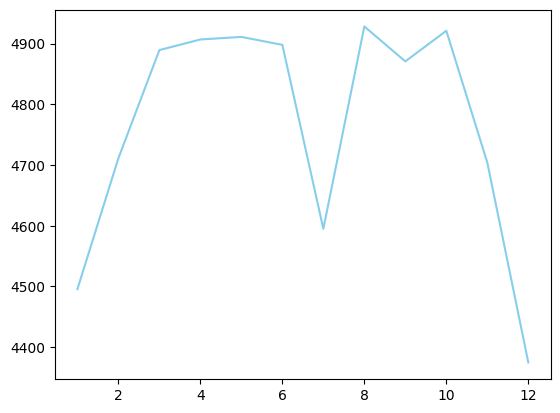

In [55]:
plt.plot(by_month['traffic_volume'], color = 'skyblue')
plt.show();

The traffic volume looks less heavy in the cold weather months (November - February) and more intense during warm months (March - October).

July has a significant less heavy traffic.

**Generate a line plot to visualize how the traffic volume changed each day of the week on average.**

On the previous screen, we generated a line plot showing how the traffic volume changed each month on average.

We'll now continue with building line plots for another time unit: day of the week.

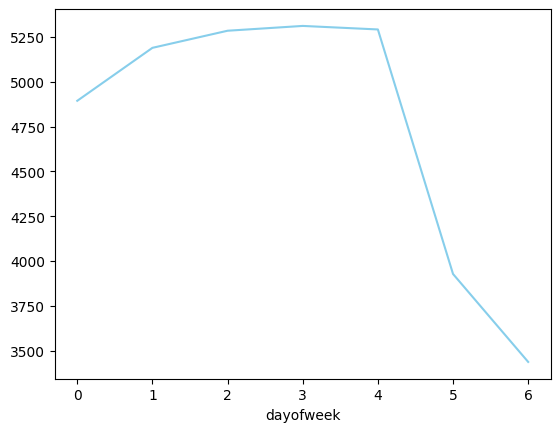

In [60]:
day_numeric['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = day_numeric.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line(color = 'skyblue')  # 0 is Monday, and 6 is Sunday
plt.show();

The traffic volume is significantly heavier on business days compared to the weekends.

**Plot two line plots on a grid chart to visualize how the traffic volume changes by time of the day.**
- One plot shows how traffic volume changes during business days and the other shows how it changes during weekends.
- Add a title to each graph.
- Bring both graphs to the same x- and y-axis range.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

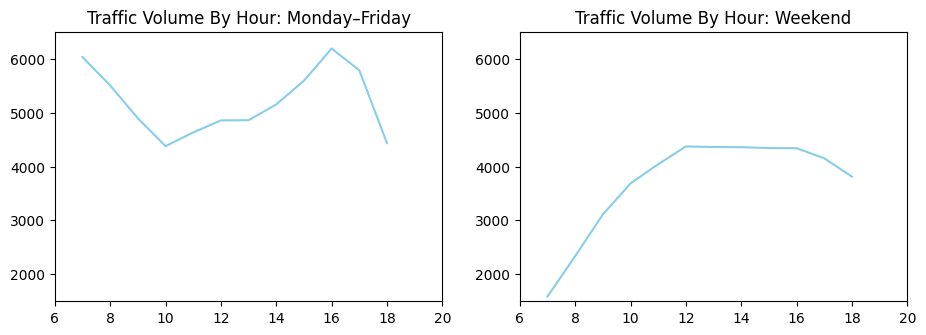

In [61]:
day_numeric['hour'] = daytime['date_time'].dt.hour

bussiness_days = day_numeric[day_numeric['dayofweek'] <= 4]  # 4 == Friday
weekend = day_numeric[day_numeric['dayofweek'] >= 5]  # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[11, 3.5])

ax1.plot(by_hour_business['traffic_volume'], color = 'skyblue')
ax1.set_title('Traffic Volume By Hour: Monday–Friday')
ax1.set_xlim(6,20)
ax1.set_ylim(1500,6500)

ax2.plot(by_hour_weekend['traffic_volume'], color = 'skyblue')
ax2.set_title('Traffic Volume By Hour: Weekend')
ax2.set_xlim(6,20)
ax2.set_ylim(1500,6500)

plt.show();

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

**Find the correlation values between traffic_volume and the numerical weather columns.**

In [42]:
day_numeric.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_volume.

**Find the weather column with the strongest correlation with traffic_volume and plot a scatter plot for this weather column and traffic_volume.**

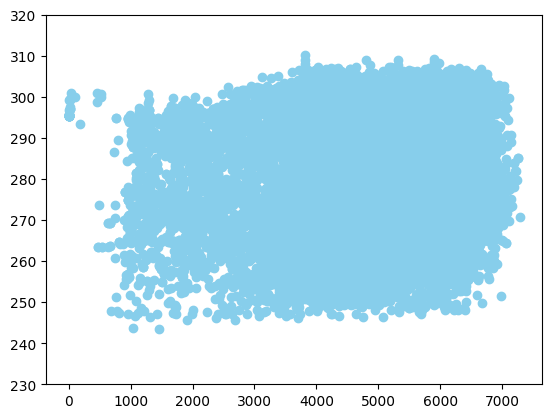

In [62]:
plt.scatter(daytime['traffic_volume'], daytime['temp'], color = 'skyblue')
plt.ylim(230, 320)
plt.show();

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

## Weather Types

To see if we can find more useful data, take a look next at the categorical weather-related columns: weather_main and weather_description.

In [66]:
by_weather_main = daytime.groupby('weather_main').agg({'temp': 'mean', 
                                                   'rain_1h': 'mean', 
                                                   'snow_1h': 'mean', 
                                                   'clouds_all': 'mean',
                                                   'traffic_volume': 'mean'})

**Plot a horizontal bar plot for the traffic_volume column of by_weather_main**

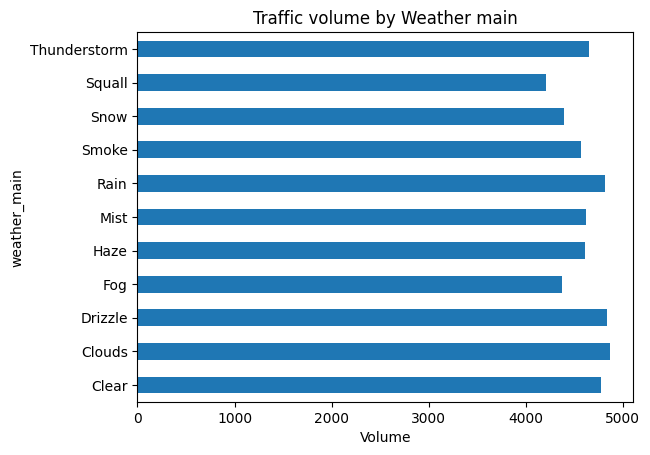

In [73]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic volume by Weather main')
plt.xlabel('Volume')
plt.show();

It looks like there is no weather main cause traffic volume exceeding 5000 cars. Thus, it's hard to examine which weather type as a heavy traffic indicator

**Plot a horizontal bar plot for the traffic_volume column of by_weather_description. This column has many unique values, so you'll need to enlarge the figure size to make it readable. You can use plt.figure(figsize=(width,height)) or Series.plot.barh(figsize=(width,height))**

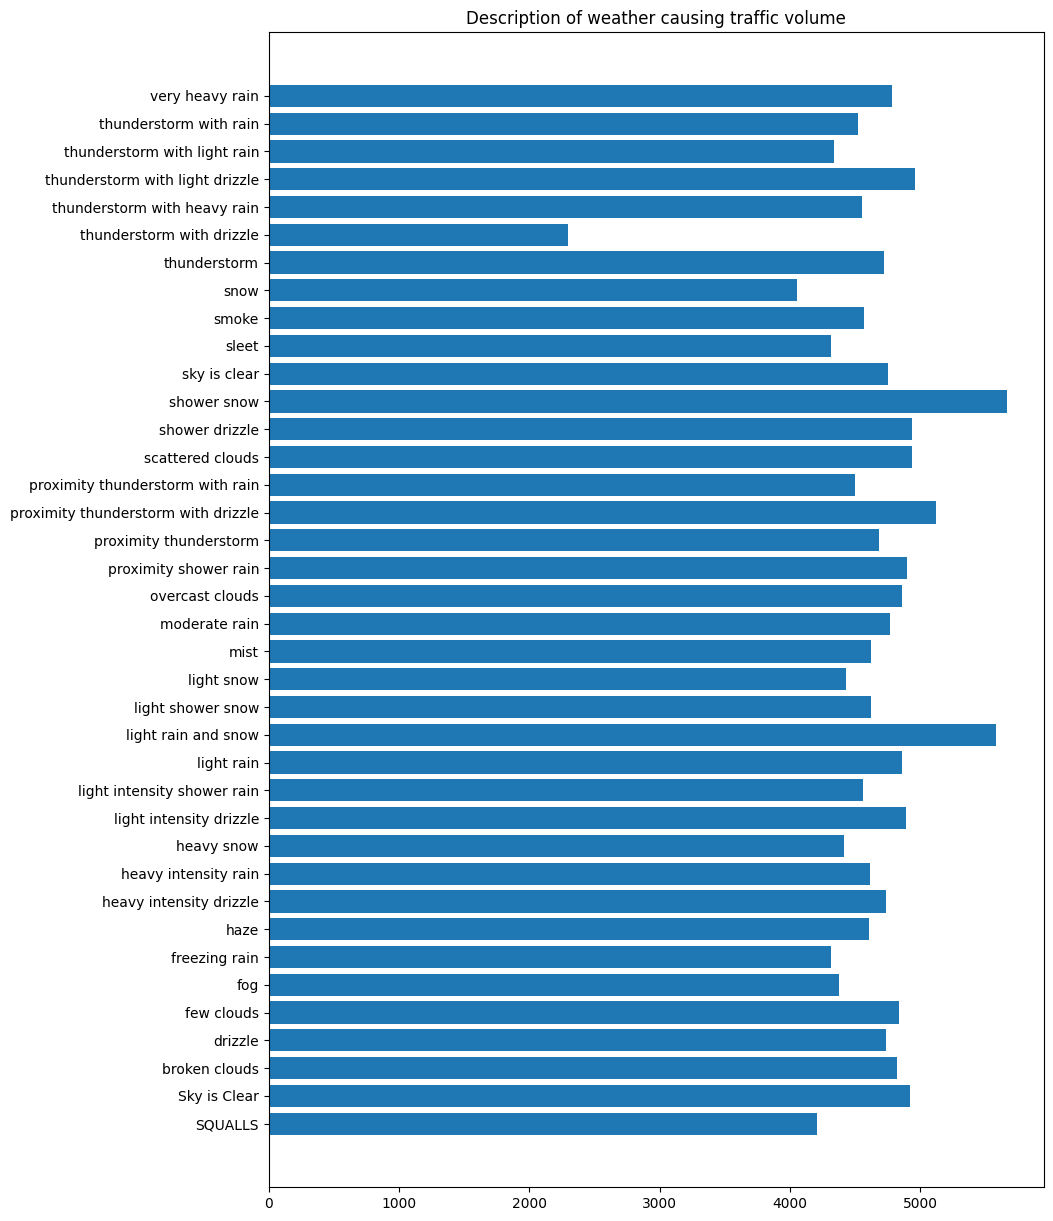

In [79]:
by_weather_description = daytime.groupby('weather_description').agg({'traffic_volume': 'mean'})

plt.figure(figsize = (10, 15))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.title('Description of weather causing traffic volume')
plt.show();

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle